# Linear and Logistic Regression using Scikit learn
---

Hope you all are well acquanited with the fundamentals of Linear and Logistic Regression now. For this week's assignment you'll be implementing both the models using Scikit learn.
We start off by importing all the relevant libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import the dataset
df = pd.read_csv("dataset1.txt")
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


The target variable/ output (y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is called as a simple linear regression. We are implementing simple linear regression to give you a good idea of how Linear Regression works. You can always practice Multivariate LR by importing some standard datasets from sklearn's datasets library

So, our target variable is 'profit' and the input variable is 'population'.

In [8]:
# Assign 'population' to the target independent variable X and 'pofit' to the dependent variable y.

X = df.population
y = df.profit

print(X.shape)
print(y.shape)

#Calculate the total number of samples in our dataset
print("Total samples in our dataset is: {}".format(X.shape[0]))

(97,)
(97,)
Total samples in our dataset is: 97


Before we begin to code our model, we first plot the data to get an idea of the relationship between the variables


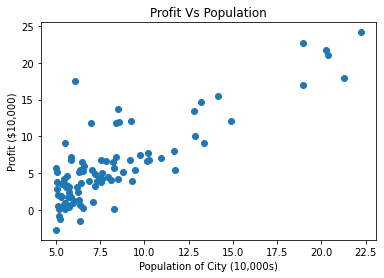

In [10]:
#Plot a scatter plot between X and y

plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit Vs Population")
plt.scatter(X, y)

We split our model into a training and test set using scikit-learn's train_test_split() function.

Splitting your dataset is essential for an unbiased evaluation of prediction performance.

In [12]:
from sklearn.model_selection import train_test_split
#set test_size equal to 20 %
#code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
#Convert and reshape pandas dataset's columns into numpy arrays to perform the required calculations
X_train = np.reshape(np.array(X_train), (-1,1))
X_test = np.reshape(np.array(X_test), (-1,1))
y_train = np.reshape(np.array(y_train), (-1,1))
y_test = np.reshape(np.array(y_test), (-1,1))

array([[ 8.3829],
       [ 5.4994],
       [ 9.7687],
       [10.136 ],
       [ 5.1793],
       [20.27  ],
       [ 5.8014],
       [18.959 ],
       [ 7.9334],
       [ 6.3261],
       [ 9.4536],
       [13.394 ],
       [ 7.0708],
       [ 6.3589],
       [ 5.6407],
       [ 7.8247],
       [ 5.6397],
       [ 8.4084],
       [ 5.4901],
       [ 7.0032],
       [ 5.0702],
       [ 5.0365],
       [ 5.3054],
       [10.274 ],
       [ 6.2742],
       [ 8.0959],
       [ 5.0594],
       [10.236 ],
       [ 7.3345],
       [ 5.4369],
       [ 6.3654],
       [10.957 ],
       [ 6.0062],
       [ 7.5402],
       [ 5.7737],
       [ 6.5159],
       [ 5.8707],
       [ 6.4296],
       [ 8.5186],
       [ 7.4764],
       [14.908 ],
       [ 5.2524],
       [ 5.1301],
       [ 8.5781],
       [ 6.3557],
       [ 5.7077],
       [ 8.2951],
       [ 9.1802],
       [ 5.8598],
       [20.341 ],
       [ 6.3328],
       [12.828 ],
       [ 5.7292],
       [ 5.3077],
       [ 5.5649],
       [11

To give you a breif recap,

We start with a hypothesis representation in form of a straight line
![Hypothesis](https://miro.medium.com/max/321/0*E4LgcnWZEeLU-9MB.png)

Then we select our cost function usually, *sum of squared errors (SSE)* in case of LR.
![Cost](https://miro.medium.com/max/625/0*8dP9eDjZGwohxVLG.png)

Then we perform gradient descent and keep updating our parameters after each iteration until the cost function reaches a global minima.
![Gradient Descent](https://miro.medium.com/max/563/0*jTrM-AfW7Q7X04DN.png)


With Scikit-Learn it is extremely straight forward to implement linear regression models, as all you really need to do is import the LinearRegression class, instantiate it, and call the fit() as it performs all the steps mentioned above itself.

In [22]:
from sklearn.linear_model import LinearRegression
#code here
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

That's it! Your model is trained

This test dataset is the unseen data set for your model which will help you have a better view of its ability to generalize. Make prediction on the test set using the trained model.

In [25]:
y_pred = model.predict(X_test)

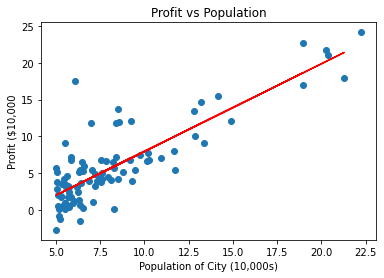

In [27]:
#Plot the graph

plt.plot(X_test,y_pred,color="r")
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit vs Population")
plt.scatter(X, y)

In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points

It is defined as the is the ratio of sum of squares of the residual errors to the total sum of the errors subtracted from 1.

In [28]:
from sklearn.metrics import r2_score
#code here
r2_score(y_test, y_pred)

0.6286647537570459

Yaay! You just built your first ML model.

# Logistic Regression Binary Classification

In [29]:
#Importing the dataset
# The sklearn.datasets package offers some toy datasets to illustrate the behaviour of some algorithms and we will be using the breast cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Divide the data into "attributes" and "labels". Attributes are the independent variables while labels are dependent variables whose values are to be predicted.

In [30]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']

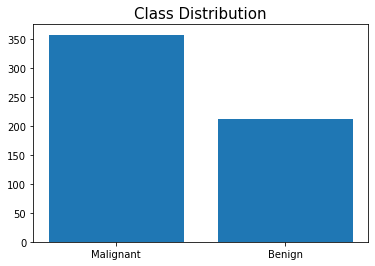

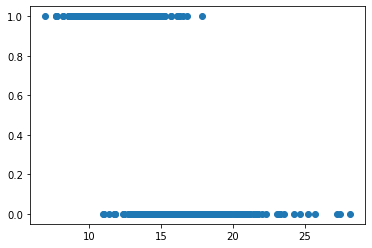

In [32]:
#Plot the data the visulasie the distribution
plt.bar(['Malignant','Benign'],[sum(y), len(y)-sum(y)])
plt.title('Class Distribution', fontsize = 15)
plt.show()

plt.scatter(X[:,0],y)

A key difference in Logistic Regression is that the output value being modeled is a binary value (0 or 1) rather than a numeric value.

This is done using a sigmoid function

![Sigmoid](https://miro.medium.com/max/339/1*Gp5E23P5d2PY5D5kOo8ePw.png)




We can not use that simple cost function here because it will not converge to global minima. To address this issue, we use the cross entropy cost function which is defined as

![Cost](https://miro.medium.com/max/2836/1*_52kKSp8zWgVTNtnE2eYrg.png)





When we calculate the partial derivates of the loss with respect to the parameters for gradient descent, we encounter an expression that is identical to what we used in Linear Regression.
![Gradient](https://miro.medium.com/max/875/1*Ecea3jVIRxK4Mkrh_Nie4w.jpeg)






In [36]:
#Scale your data so that it converges faster
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

#Split the data into train and test set with test size= 0.2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
#code here

Now, we'll try implementing the same by calling scikit learn's LogisticRegression function

In [37]:
from sklearn.linear_model import LogisticRegression
#code here
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
#Make prediction on the test set using the trained model.

y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

Yaay! You've successfuly created a classification model with a great accuracy. 